# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# pip install citipy

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
import os

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
# Set the API base URL weat
url = "http://api.openweathermap.org/data/2.5/weather?"

print(url)
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | selfoss
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | loreto
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | hotan
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | laza
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | ilha de mocambique
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | puerto baquerizo moreno
Processing Record 20 of Set 1 | isafjordur
Processing Re

Processing Record 36 of Set 4 | buka
Processing Record 37 of Set 4 | namibe
Processing Record 38 of Set 4 | joshimath
Processing Record 39 of Set 4 | yung shue wan
Processing Record 40 of Set 4 | thi xa phu my
City not found. Skipping...
Processing Record 41 of Set 4 | lashio
Processing Record 42 of Set 4 | nuku'alofa
Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | bhimunipatnam
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | ulladulla
Processing Record 47 of Set 4 | yemva
Processing Record 48 of Set 4 | tolanaro
Processing Record 49 of Set 4 | ust'-ilimsk
Processing Record 0 of Set 5 | abatskoye
Processing Record 1 of Set 5 | tofol
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | kavieng
Processing Record 4 of Set 5 | novoutkinsk
Processing Record 5 of Set 5 | sao gabriel da cachoeira
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | saint-philippe
Processing Record 8 of Set 5 | pitimbu


Processing Record 30 of Set 8 | satupa'itea
City not found. Skipping...
Processing Record 31 of Set 8 | timbuktu
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | bembereke
Processing Record 34 of Set 8 | pasni
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | gebeit
Processing Record 37 of Set 8 | malindi
Processing Record 38 of Set 8 | hobyo
Processing Record 39 of Set 8 | thinadhoo
Processing Record 40 of Set 8 | hilo
Processing Record 41 of Set 8 | lawas
Processing Record 42 of Set 8 | bouna
Processing Record 43 of Set 8 | vorgashor
Processing Record 44 of Set 8 | ahau
City not found. Skipping...
Processing Record 45 of Set 8 | amungan
Processing Record 46 of Set 8 | camana
Processing Record 47 of Set 8 | tura
Processing Record 48 of Set 8 | nejo
Processing Record 49 of Set 8 | arraial do cabo
Processing Record 0 of Set 9 | fortuna
Processing Record 1 of Set 9 | laojunmiao
Processing Record 2 of Set 9 | mont-dore
Processing R

Processing Record 20 of Set 12 | indramayu
Processing Record 21 of Set 12 | hirara
Processing Record 22 of Set 12 | copiapo
Processing Record 23 of Set 12 | al jahra'
Processing Record 24 of Set 12 | magong
Processing Record 25 of Set 12 | cestos city
Processing Record 26 of Set 12 | agat village
Processing Record 27 of Set 12 | san jose de jachal
Processing Record 28 of Set 12 | jayapura
Processing Record 29 of Set 12 | longavi
Processing Record 30 of Set 12 | tsiroanomandidy
Processing Record 31 of Set 12 | yanam
Processing Record 32 of Set 12 | hanko
Processing Record 33 of Set 12 | salahonda
Processing Record 34 of Set 12 | farafangana
Processing Record 35 of Set 12 | dambai
City not found. Skipping...
Processing Record 36 of Set 12 | kavarna
Processing Record 37 of Set 12 | prince rupert
Processing Record 38 of Set 12 | umm kaddadah
Processing Record 39 of Set 12 | uturoa
Processing Record 40 of Set 12 | guiuan
Processing Record 41 of Set 12 | zeribet el oued
Processing Record 42 

In [76]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [77]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,285.43,38,11,2.46,RU,1684993471
1,selfoss,63.9331,-20.9971,278.73,80,100,9.46,IS,1684993471
2,qaqortoq,60.7167,-46.0333,273.76,99,100,3.39,GL,1684993471
3,pisco,-13.7000,-76.2167,293.18,83,20,2.57,PE,1684993471
4,waitangi,-43.9535,-176.5597,285.27,79,38,3.13,NZ,1684993471


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [79]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,285.43,38,11,2.46,RU,1684993471
1,selfoss,63.9331,-20.9971,278.73,80,100,9.46,IS,1684993471
2,qaqortoq,60.7167,-46.0333,273.76,99,100,3.39,GL,1684993471
3,pisco,-13.7000,-76.2167,293.18,83,20,2.57,PE,1684993471
4,waitangi,-43.9535,-176.5597,285.27,79,38,3.13,NZ,1684993471


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

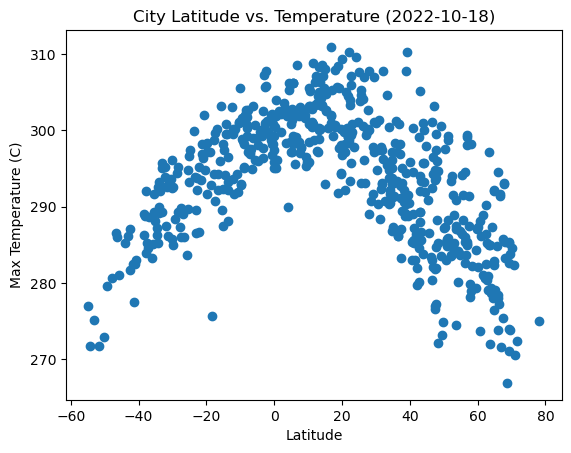

In [80]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x,y)
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

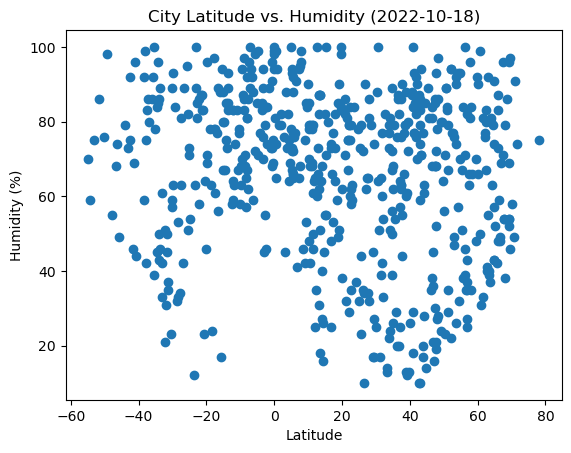

In [81]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
# Incorporate the other graph properties
plt.scatter(x,y)
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
                 
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

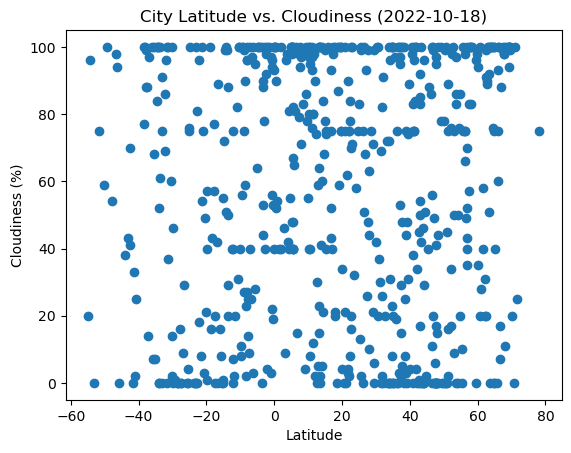

In [82]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x,y)
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

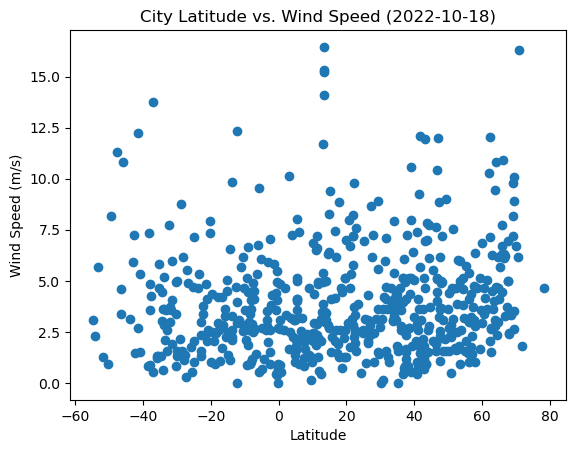

In [83]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x,y)
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def create_lr(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Temperature")
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,285.43,38,11,2.46,RU,1684993471
1,selfoss,63.9331,-20.9971,278.73,80,100,9.46,IS,1684993471
2,qaqortoq,60.7167,-46.0333,273.76,99,100,3.39,GL,1684993471
5,loreto,22.2667,-101.9667,293.29,60,8,3.74,MX,1684993472
7,hotan,37.0997,79.9269,296.85,25,95,6.07,CN,1684993472


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,pisco,-13.7000,-76.2167,293.18,83,20,2.57,PE,1684993471
4,waitangi,-43.9535,-176.5597,285.27,79,38,3.13,NZ,1684993471
6,blackmans bay,-43.0167,147.3167,286.22,73,43,5.91,AU,1684993472
8,ushuaia,-54.8000,-68.3000,276.96,70,20,3.09,AR,1684993472
12,ilha de mocambique,-15.0342,40.7358,298.16,67,1,2.47,MZ,1684993473


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5746597053234656


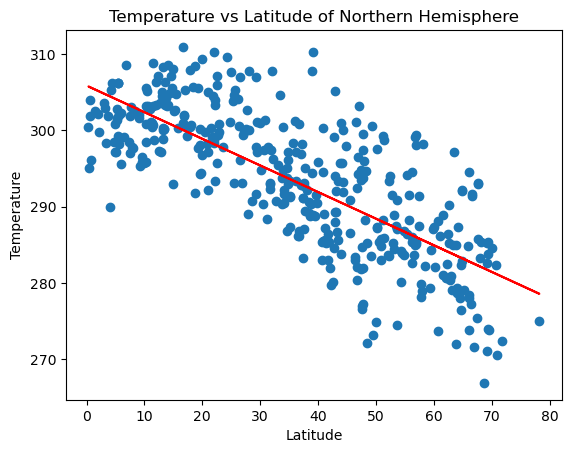

In [87]:
# Linear regression on Northern Hemisphere
create_lr(x_values=northern_hemi_df['Lat'],
           y_values=northern_hemi_df['Max Temp'],
           title='Temperature vs Latitude of Northern Hemisphere',
           text_coordinates=(0, 90))

The r-value is: 0.6637900078881068


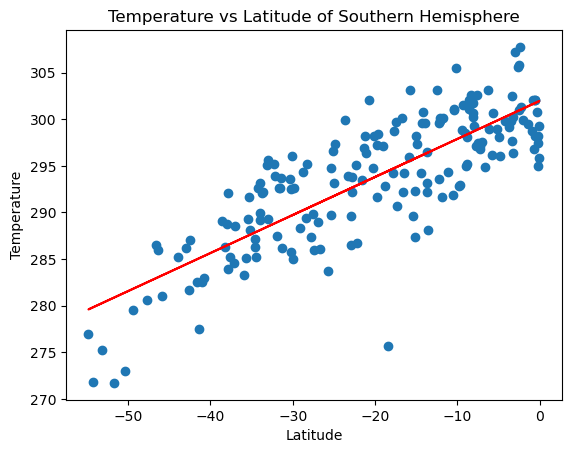

In [88]:
# Linear regression on Southern Hemisphere
create_lr(x_values=southern_hemi_df['Lat'],
           y_values=southern_hemi_df['Max Temp'],
           title='Temperature vs Latitude of Southern Hemisphere',
           text_coordinates=(0, -90))

**Discussion about the linear relationship:** In the first plot there appears to be a strong negative correlation between temperature and latitude. As you go further North, temperature is shown to decrease. In the second plot, however, there appears to be a strong positive correlation between latitude and the temperature in the Southern Hemisphere. The further South you go, the temperature is shown to increase. 

### Humidity vs. Latitude Linear Regression Plot

In [89]:
# Define a function to create Linear Regression plots
def create_lr(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.009250587754714832


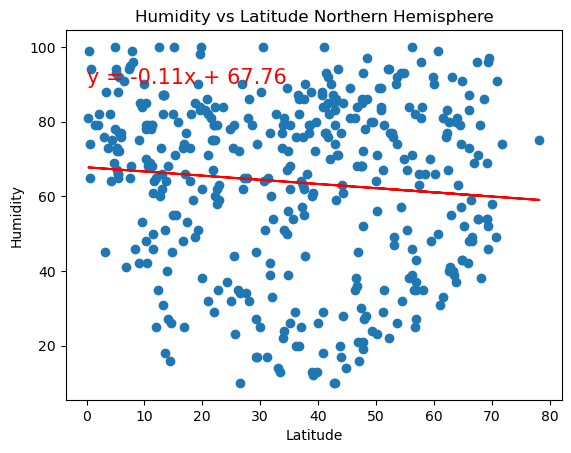

In [90]:
# Northern Hemisphere
create_lr(x_values=northern_hemi_df['Lat'],
           y_values=northern_hemi_df['Humidity'],
           title='Humidity vs Latitude Northern Hemisphere',
           text_coordinates=(0, 90))

The r-value is: 0.057618893441296684


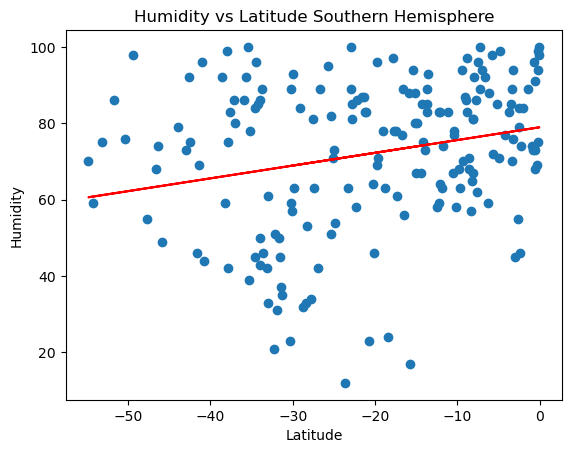

In [91]:
# Southern Hemisphere
create_lr(x_values=southern_hemi_df['Lat'],
           y_values=southern_hemi_df['Humidity'],
           title='Humidity vs Latitude Southern Hemisphere',
           text_coordinates=(0, -90))

**Discussion about the linear relationship:** The linear regression for the humidity versus the latitude for the Northern Hemisphere shows a weak negative correlation. As you go further North, the humidity decreases. The linear regression for the humidity versus the latitude for the Southern Hemisphere showes a weak positive correlation. As you go further South, the humidity increases. 

### Cloudiness vs. Latitude Linear Regression Plot

In [92]:
# Define a function to create Linear Regression plots
def create_lr(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.0014692833108615748


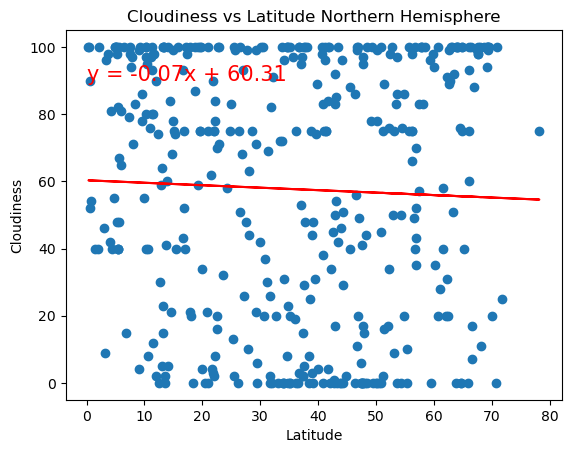

In [93]:
# Northern Hemisphere
create_lr(x_values=northern_hemi_df['Lat'],
           y_values=northern_hemi_df['Cloudiness'],
           title='Cloudiness vs Latitude Northern Hemisphere',
           text_coordinates=(0, 90))

The r-value is: 0.006664104973775021


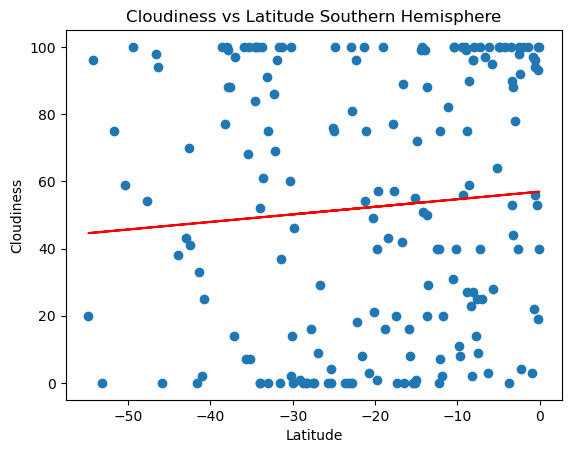

In [94]:
# Southern Hemisphere
create_lr(x_values=southern_hemi_df['Lat'],
           y_values=southern_hemi_df['Cloudiness'],
           title='Cloudiness vs Latitude Southern Hemisphere',
           text_coordinates=(0, -90))

**Discussion about the linear relationship:** The linear regression for the cloudiness versus the latitude showed a weak negative correlation for both the Nothern and Southern Hemisphere. As you go further North and South the cloudiness decreases. 

### Wind Speed vs. Latitude Linear Regression Plot

In [95]:
# Define a function to create Linear Regression plots
def create_lr(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.016484227146769437


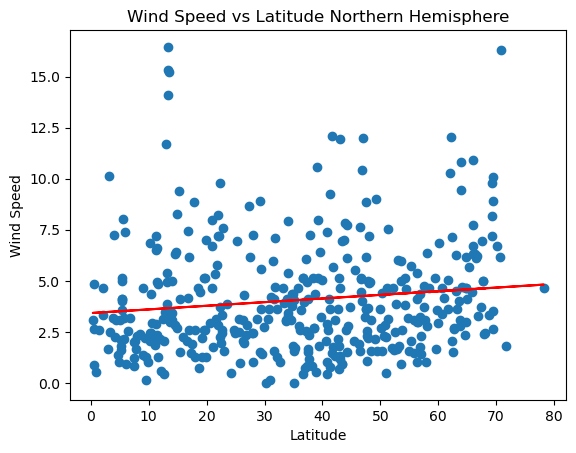

In [96]:
# Northern Hemisphere
create_lr(x_values=northern_hemi_df['Lat'],
           y_values=northern_hemi_df['Wind Speed'],
           title='Wind Speed vs Latitude Northern Hemisphere',
           text_coordinates=(0, 90))

The r-value is: 0.02119205191293498


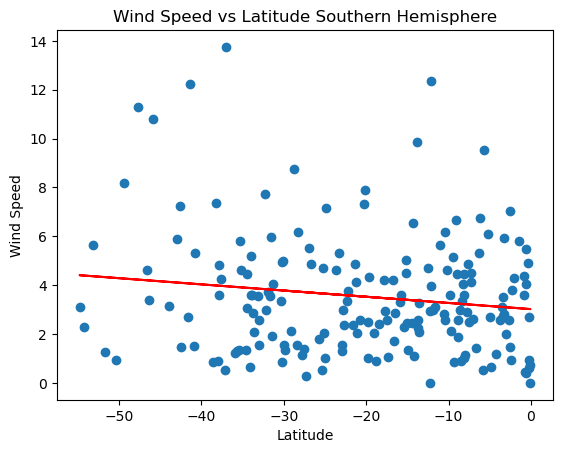

In [97]:
# Southern Hemisphere
create_lr(x_values=southern_hemi_df['Lat'],
           y_values=southern_hemi_df['Wind Speed'],
           title='Wind Speed vs Latitude Southern Hemisphere',
           text_coordinates=(0, -90))

**Discussion about the linear relationship:** The linear regression for the wind speed versus latitude for the Northern Hemisphere shows a weak positive correlation. As you go futher North, the wind speed slightly increases. The linear regression for the wind speed versus latitude for the Southern Hemisphere showes a negative correlation. As you go futher South, the wind speed decreases.